# Data preprocessing

In this notebook, I am going to take the raw book data and prepare it for the modeling stage. 

In [1]:
#Installs
# !pip install surprise

In [2]:
# Import the necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # We will use squared=False

import time
#import os
from library.sb_utils import save_file

import scipy.sparse
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the data 
books = pd.read_csv('../data/raw/books.csv')
ratings = pd.read_csv('../data/raw/ratings.csv')
tags = pd.read_csv('../data/raw/tags.csv')
book_tags = pd.read_csv('../data/raw/book_tags.csv')
to_read = pd.read_csv('../data/raw/to_read.csv')

In [4]:
books.replace(to_replace='J.K. Rowling, Mary GrandPré', value = 'J.K. Rowling', inplace=True)

In [5]:
to_read_counts = pd.DataFrame(to_read['book_id'].value_counts())
to_read_counts = to_read_counts.rename(columns={'book_id':'to_read_count'})
to_read_counts.index.name ="book_id"
to_read_counts.reset_index(inplace=True)
to_read_counts.head()

,book_id,to_read_count
0,47,2772
1,143,1967
2,113,1840
3,13,1812
4,11,1767


In [6]:
books=books.merge(to_read_counts, on='book_id')
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,to_read_count
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,973
1,2,3,3,4640799,491,439554934,9.780440e+12,J.K. Rowling,1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,400
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,287
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,1478
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,1293


In [7]:
books=books.drop(['image_url','small_image_url'], axis=1)

In [8]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [9]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [10]:
tag_merged = book_tags.merge(tags, on='tag_id')
tag_merged.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [11]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,to_read_count
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,973
1,2,3,3,4640799,491,439554934,9.780440e+12,J.K. Rowling,1997.0,Harry Potter and the Philosopher's Stone,...,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,400
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,287
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,1478
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,1293


### Genres
I am going to hardcode some basic genres since the tags list is so varied and unclean. I will base it off of the most popular tags.  

In [12]:
# Top 50 tags
top_tags = sorted(tag_merged.sort_values('count',ascending=False).tag_name.unique()[:50])

In [13]:
# Hard code some popular genres
genres=["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", \
        "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", \
        "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", \
        "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", \
        "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", \
        "Sports", "Thriller", "Travel", "Young Adult"]
for i in range(len(genres)):
    genres[i]=genres[i].lower()

for genre in top_tags: 
    if genre not in genres: 
        genres.append(genre)

In [14]:
len(genres)

72

In [15]:
new_tags=tag_merged[tag_merged.tag_name.isin(genres)]

In [16]:
new_tags.sort_values('count', ascending=False)

,goodreads_book_id,tag_id,count,tag_name
84,865,30574,596234,to-read
6140,2429135,30574,586235,to-read
9108,18143977,30574,505884,to-read
2,3,30574,496107,to-read
1671,24280,30574,488469,to-read
...,...,...,...,...
30195,2693801,8717,1,currently-reading
479243,3061,14552,1,history
526263,452157,32865,1,writing
724531,7011879,6750,1,chick-lit


This has helped us keep tags to a minimum, helping computation, while still adding a lot of value! 

Let's add them to the books dataframe. 

In [17]:
# Get the top 3 tags for each book
top_3 = {}
for book_id in new_tags.goodreads_book_id.unique(): 
    book_tags = new_tags[new_tags.goodreads_book_id == book_id].sort_values('count', ascending=False)
    top_3[book_id] = list(zip(book_tags.tag_id[:3], book_tags.tag_name[:3]))

print(len(new_tags.goodreads_book_id.unique()))
print(len(top_3.keys()))

10000
10000


In [18]:
print(books.shape)

(9986, 22)


In [19]:
# make a new row per item per tag
books=books.join(
    pd.concat(
        [new_tags.set_index('goodreads_book_id')['tag_name']],
        axis=1, keys='tags' #list(range(len(new_tags)))
    ), on='goodreads_book_id')

In [20]:
# # Aggregate the tags into a single column
books=books.groupby('book_id').agg({'goodreads_book_id':'first', 'best_book_id':'first', 'work_id':'first',
       'books_count':'first', 'isbn':'first', 'isbn13':'first', 'authors':'first', 'original_publication_year':'first',
       'original_title':'first', 'title':'first', 'language_code':'first', 'average_rating':'first',
       'ratings_count':'first', 'work_ratings_count':'first', 'work_text_reviews_count':'first',
       'ratings_1':'first', 'ratings_2':'first', 'ratings_3':'first', 'ratings_4':'first', 'ratings_5':'first',
       'to_read_count':'first','t': ', '.join}).reset_index()

In [21]:
books.rename(columns={'t':'tags'}, inplace=True)

In [22]:
print(books.shape)
books.head()

(9986, 23)


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,to_read_count,tags
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,973,"to-read, fantasy, favorites, currently-reading..."
1,2,3,3,4640799,491,439554934,9.780440e+12,J.K. Rowling,1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,400,"to-read, fantasy, favorites, currently-reading..."
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,287,"to-read, fantasy, favorites, currently-reading..."
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,1478,"to-read, favorites, currently-reading, young-a..."
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,1293,"to-read, favorites, currently-reading, young-a..."


### Average vs baysean average

The Bayesian average adjusts the average rating of products whose rating counts fall below a threshold. I'll calcualte it below and show how it impacts averages. 

In [23]:
book_stats = ratings.groupby('book_id')[['rating']].agg(['count', 'mean'])
book_stats.columns = book_stats.columns.droplevel()

In [24]:
C = book_stats['count'].mean()
m = book_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings.groupby('book_id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['book_id', 'bayesian_avg']
book_stats = book_stats.merge(bayesian_avg_ratings, on='book_id')

In [25]:
book_stats = book_stats.merge(books[['book_id', 'title']])
book_stats.sort_values('bayesian_avg', ascending=False).head()

,book_id,count,mean,bayesian_avg,title
24,25,15304,4.525941,4.502533,Harry Potter and the Deathly Hallows (Harry Po...
421,422,1915,4.659530,4.479617,"Harry Potter Boxset (Harry Potter, #1-7)"
861,862,1373,4.702840,4.460310,"Words of Radiance (The Stormlight Archive, #2)"
779,780,1394,4.661406,4.433867,Calvin and Hobbes
26,27,15081,4.443339,4.422748,Harry Potter and the Half-Blood Prince (Harry ...


Above the mean rating and the average rating are shown. The values of the top rated movies are close to their true average, which is good. 

In [26]:
book_stats.sort_values('bayesian_avg', ascending=True).head()

,book_id,count,mean,bayesian_avg,title
33,34,7724,3.092439,3.150662,"Fifty Shades of Grey (Fifty Shades, #1)"
2,3,16931,3.214341,3.237825,"Twilight (Twilight, #1)"
48,49,9712,3.217360,3.257114,"New Moon (Twilight, #2)"
1792,1793,295,2.077966,3.299958,One Night at the Call Center
341,342,2863,3.174991,3.300741,The Casual Vacancy


Here we see that the average rating for lower rated films has more varience. This makes sense, as we are 

In [27]:
books=books.merge(book_stats[['book_id','bayesian_avg']], on='book_id')

Now that we have added the tags and info about the to-read shelf, I am ready to move to the modeling phase. 

# Modeling

1. Split the data into train and test
2. Performace criterion
3. Some basic options
4. The Surprise library

### 1. Split data into train and test

In [28]:
user_ids = ratings.user_id.unique()
len(user_ids)

53424

At first, I want to take only 5k user IDS, then at the end I can scale to the full 53,424. 

In [29]:
users_train, users_test = train_test_split(user_ids, test_size=0.3, random_state=42)

In [30]:
ratings_train = ratings[ratings.user_id.isin(users_train)]
ratings_test = ratings[~ratings.user_id.isin(users_train)]

In [31]:
print(ratings_train.shape, ratings_test.shape)

(4183807, 3) (1792672, 3)


In [32]:
ratings_test.columns

Index(['user_id', 'book_id', 'rating'], dtype='object')

### 2. Performace criterion

Performance can be evaluated in a number of ways. Options include RMSE, ROC curves, Precision/Recall/F-Scores, and cost curves. I am going to focus on RMSE as our main criterion, and also examine ROC curves. 

### 3. Some basic options

In terms of recommendation systems, there are three major options: collaborative filtering, content-based filterin, and a hybrid of the two. Collaborative filtering  focuses on the user, asking "what do users like you like?" Content based filtering asks, "What items are similar to items you like?" Hybrid takes both of these into account. A great lecture on the different styles can be found here: https://www.youtube.com/watch?v=F6gWjOc1FUs&ab_channel=PyCon2015

I am skipping these and moving directly to using the surprise library, which is an easy to use python library for recommendation systems. 

First, the baseline: if we simply took the average rating, how do we do? 

In [33]:
ratings_train_avg = ratings_train.rating.mean()
ratings_train_avg

3.9213512956023067

In [34]:
def evaluate(estimate_f):
    """
    RMSE based predictive performace evaluation.
    
    Args:
        estimate_f: the function we are evaluating
    
    Returns:
        RMSE of the function, tested on the test set of the book ratings
    """
    ids_to_estimate = zip(ratings_test.user_id, ratings_test.book_id)
    estimated = np.array([estimate_f(u,b) for (u,b) in (ids_to_estimate)])
    real = ratings_test.rating.values
    return mean_squared_error(estimated, real, squared=False)

In [35]:
def avg_rating(user_id, book_id):
    return(ratings_train_avg)

In [36]:
ts = time.time()
print("RMSE for content-mean estimate: {:.4f}".format(evaluate(avg_rating)))
print("took {:.2f} seconds ({:.2f} minutes) to evaluate".format(time.time()-ts, (time.time()-ts)/60.0))

RMSE for content-mean estimate: 0.9937
took 0.48 seconds (0.01 minutes) to evaluate


### Helper function: Sparce matrix

In [37]:
# Make a sparce matrix

from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe
    
    Returns:
        X: sparse matrix (scipy.sparse.csr.csr_matrix)
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        book_mapper: dict that maps movie id's to movie indices
        book_inv_mapper: dict that maps movie indices to movie id's
    """
    N = df['user_id'].nunique()
    M = df['book_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(N))))
    book_mapper = dict(zip(np.unique(df["book_id"]), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["user_id"])))
    book_inv_mapper = dict(zip(list(range(M)), np.unique(df["book_id"])))
    
    user_index = [user_mapper[i] for i in df['user_id']]
    book_index = [book_mapper[i] for i in df['book_id']]

    X = csr_matrix((df["rating"], (book_index, user_index)), shape=(M, N))
    
    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

In [38]:
X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_X(ratings)

In [39]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])

print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.12%


In [40]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


Only 1.12% of cells in our user-item matrix are populated with ratings. This is fine, since it is more than 0.5%

In [41]:
# Save the data
books.to_csv("../data/processed/books.csv", index=False)

In [42]:
ratings.to_csv("../data/processed/ratings.csv", index=False)

In [43]:
scipy.sparse.save_npz('../data/processed/sparse_matrix.npz', X)

### A simple hybrid system

In [44]:
def pearson(s1, s2):
    # Take two series and return pearson correlation
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return(np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * (np.sum(s2_c ** 2))))

In [45]:
class CollabPearsonReco:
    
    def learn(self):
        self.all_user_profiles = ratings.pivot_table(values='rating', index='book_id',columns='user_id')
    
    def estimate(self, user_id, book_id):
        ratings_by_others = ratings_train[ratings_train.book_id == book_id]
        if ratings_by_others.empty: 
            return(ratings_train_avg)
        
        ratings_by_others.set_index('user_id', inplace=True)
        their_ids = ratings_by_others.index
        their_ratings = ratings_by_others.rating
        their_profiles = self.all_user_profiles[their_ids]
        user_profile = self.all_user_profiles[user_id]
        sims = their_profiles.apply(lambda profile: pearson(profile, user_profile), axis=0)
        ratings_sims = pd.DataFrame({'sim': sims, 'rating':their_ratings})
        ratings_sims = ratings_sims[ratings_sims.sim > 0]
        
        if ratings_sims.empty: 
            return(their_ratings.mean())
        else:
            return(np.average(ratings_sims.rating, weights=ratings_sims.sim))

In [46]:
ts = time.time()
reco = CollabPearsonReco()
reco.learn()
print("took {:.2f} seconds ({:.2f} minutes) to learn".format(time.time()-ts, (time.time()-ts)/60.0))

took 15.87 seconds (0.26 minutes) to learn


In [47]:
# It turns out, this takes a while to run and is not really worth it for the sake of the capstone. 
# ts = time.time()
# print("RMSE for content-mean estimate: {:.4f}".format(evaluate(reco.estimate)))
# print("took {:.2f} seconds ({:.2f} minutes) to evaluate".format(time.time()-ts, (time.time()-ts)/60.0))

### 4. The Surprise Library

Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. Find out more here: http://surpriselib.com/

In [48]:
#Installs
# !pip install surprise

In [49]:
# imports 
import seaborn as sns
import scipy
from collections import defaultdict
import surprise as sp
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [50]:
#Turn the CSV files into data frames
books = pd.read_csv('../data/processed/books.csv')
ratings = pd.read_csv('../data/processed/ratings.csv')
sparse = scipy.sparse.load_npz('../data/processed/sparse_matrix.npz')

In [51]:
sparsity = sparse.count_nonzero()/(sparse.shape[0]*sparse.shape[1])

print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.12%


In [52]:
# Top 10 raters by id
ratings.user_id.value_counts(ascending=False)[:10]

12874    200
30944    200
52036    199
12381    199
28158    199
45554    197
6630     197
37834    196
15604    196
7563     196
Name: user_id, dtype: int64

In [53]:
# Bottom 10 raters by id
ratings.user_id.value_counts(ascending=True)[:10]

34590    19
43675    20
40753    21
32128    21
51725    21
42736    22
25258    22
38280    22
16470    22
37640    22
Name: user_id, dtype: int64

### Helper functions

In [54]:
def read_data_surprise (df, minstar=1, maxstar=3, col1='user_id', col2='route', col3='rating'):
    '''
    Produces a surpise library data object from original dataframe

    ---Parameters---

    df (Pandas DataFrame)
    minstar (int) minimum star possible in dataset (default set to 1)
    maxstar (int) maximum star possible in dataset (default set to 3)
    col1 (string) column name that MUST correspond the the users in the df
    col2 (string) column name that MUST corresponds the the items in the df
    col3 (string) column name that corresponds the the ratings of the items in the df

    ---Returns---
    surprise library data object to manipulate later

    '''
    # need to specify the rating_scale of stars (default 1-3 stars)
    reader = sp.Reader(rating_scale=(minstar, maxstar))
    # The columns must correspond to user id, item id and ratings (in that order).
    data = sp.Dataset.load_from_df(df[[col1, col2, col3]], reader)

    return data

In [55]:
def algo_tester(data_object):
    '''
    Produces a dataframe displaying all the different RMSE's, test & train times of the different surprise algorithms

    ---Parameters---
    data_object(variable) created from the read_data_surprise function

    ---Returns---
    returns a dataframe where you can compare the performance of different algorithms
    '''
    benchmark = []
    algos = [sp.SVDpp(), sp.SVD(), sp.SlopeOne(), sp.NMF(), sp.NormalPredictor(), sp.KNNBaseline(), sp.KNNBasic(), sp.KNNWithMeans(), sp.KNNWithZScore(), sp.BaselineOnly(), sp.CoClustering()]

    # Iterate over all algorithms
    for algorithm in tqdm(algos):
        # Perform cross validation
        results = cross_validate(algorithm, data_object, measures=['RMSE'], cv=3, verbose=False)

        # Get results & append algorithm name
        tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
        benchmark.append(tmp)

    benchmark = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
    return benchmark


In [56]:
def violin_accuracy(algo, testset):
    '''
    Plot violin chart showing descrepancy between true and predicted ratings with means & standard deviations included

    ---Parameters---
    algo (predefined variable) of the algorithm being used
    testset (variable) of which test data set being used

    ---Returns---
    Means and standard deviations of the estimated predictions per true rating
    Violin chart comparing real ratings to predicted ratings

    '''

    predictions = algo.test(testset)
    predict_df = pd.DataFrame(predictions)

    #Calculating Means and standard deviations per true rating
    p_mean= predict_df.groupby("r_ui")["est"].mean()
    p_std = predict_df.groupby("r_ui")["est"].std()
    print (type(p_mean))
    print (f"Means of Predicted per True Rating: {p_mean}")
    print (f"STD of Predicted per True Rating: {p_std}")

    #Plotting the Violin plot
    sns.violinplot( x=predict_df["r_ui"], y= predict_df["est"], saturation= .5)
    plt.xlabel('True Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('True vs. Predicted Ratings Using SVD')

**For the sake of getting the best results with my limited RAM, I am going to take only users with 150-200 ratings.**

In [57]:
num_ratings = ratings.user_id.value_counts()
hundred_fifty_ids = num_ratings[num_ratings.values >= 150].index
hundred_fifty = ratings[ratings.user_id.isin(hundred_fifty_ids)]
hundred_fifty

In [61]:
reader = sp.Reader(rating_scale=(1, 5))
surprise_150_data = sp.Dataset.load_from_df(hundred_fifty[['user_id','book_id','rating']], reader)

### Choosing a model

In [62]:
%%time
algo_tests = algo_tester(surprise_150_data)
algo_tests

  0%|          | 0/11 [00:00<?, ?it/s]

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.846980,482.357465,18.348852
KNNBaseline,0.852641,9.611745,54.602475
KNNWithZScore,0.857447,8.001642,51.533163
KNNWithMeans,0.857505,7.487434,49.246835
SVD,0.859424,19.162581,1.542549
BaselineOnly,0.861116,1.439587,1.463781
SlopeOne,0.862625,4.815664,14.516517
CoClustering,0.878325,9.864608,1.598594
NMF,0.882230,23.187771,1.673381


The SVDpp had a very long fit time, but the test time was very short and it had the best RMSE.
The KNNBaseline had a better fit time, with a slower test time, but overall shorter time and a very similar RMSE. 
Copy of results here:
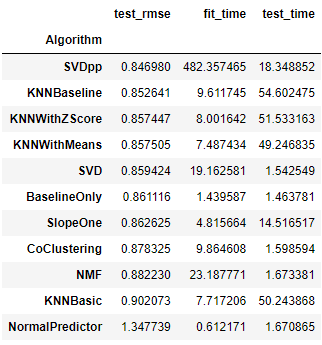

### SVD++

In [63]:
surprise_150_data

In [64]:
trainset, testset = train_test_split(surprise_150_data, test_size=.2, random_state=101)

In [65]:
%%time 
SVDpp_algo = sp.SVDpp()
SVDpp_algo.fit(trainset)
predictions_SVDpp = SVDpp_algo.test(testset)
sp.accuracy.rmse(predictions_SVDpp)

RMSE: 0.8426
Wall time: 12min 18s


0.8426005781908918

<class 'pandas.core.series.Series'>
Means of Predicted per True Rating: r_ui
1.0    3.028677
2.0    3.298327
3.0    3.561072
4.0    3.857403
5.0    4.255629
Name: est, dtype: float64
STD of Predicted per True Rating: r_ui
1.0    0.797535
2.0    0.571727
3.0    0.481708
4.0    0.454022
5.0    0.493133
Name: est, dtype: float64


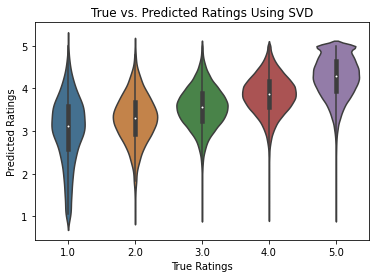

In [66]:
violin_accuracy(SVDpp_algo, testset)

In [70]:
# save the model 
import pickle
pickle.dump(SVDpp_algo, open('../models/SVDpp_150.sav', 'wb'))

### KNNBaseline

In [71]:
%%time 
KNNBaseline_algo = sp.KNNBaseline()
KNNBaseline_algo.fit(trainset)
predictions_KNNBaseline = KNNBaseline_algo.test(testset)
sp.accuracy.rmse(predictions_KNNBaseline)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8494
Wall time: 49.8 s


0.8493858000029237

<class 'pandas.core.series.Series'>
Means of Predicted per True Rating: r_ui
1.0    3.189203
2.0    3.366142
3.0    3.586319
4.0    3.864949
5.0    4.240617
Name: est, dtype: float64
STD of Predicted per True Rating: r_ui
1.0    0.701088
2.0    0.517493
3.0    0.449424
4.0    0.426886
5.0    0.469362
Name: est, dtype: float64


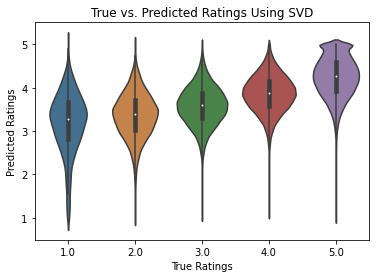

In [73]:
violin_accuracy(KNNBaseline_algo, testset)

In [75]:
# save the model to disk
pickle.dump(KNNBaseline_algo, open('../models/KNNBaseline_150.sav', 'wb'))

As we can see from the violin plots, the items rated highly are most accurately high rated items; the lower accuracy on lower values is less important. 